<a href="https://colab.research.google.com/github/Daeuning/Daisitext/blob/main/MobileFaceSwap_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileFaceSwap Playground 🎮

> MobileFaceSwap을 간단히 체험해보기 위한 코드를 공유드립니다!

- 👩🏻‍💻 Developer : [Tackhyun Jung](https://github.com/takhyun12)
- References : [Official MobileFaceSwap](https://github.com/Seanseattle/MobileFaceSwap), [Forked MobileFaceSwap](https://github.com/takhyun12/MobileFaceSwap)

## 💻 GPU 환경설정

> [런타임]-[런타임 유형 변경]-[하드웨어 가속기]를 반드시 `GPU`로 설정하세요.
>
> [런타임 구성]을 `RAM`에서 `고용량 RAM`으로 변환하면 더욱 좋습니다.

## 💾 프로젝트 환경설정

> Github에서 프로젝트 코드와 사전 학습된 모델을 다운로드 합니다.
>
> 설치가 필요한 라이브러리를 pip install을 통해 설치합니다.


In [3]:
!git clone https://github.com/takhyun12/MobileFaceSwap
%cd /content/MobileFaceSwap

!wget https://github.com/takhyun12/MobileFaceSwap/releases/download/checkpoints/checkpoints.zip

!mkdir /content/MobileFaceSwap/checkpoints
!unzip /content/MobileFaceSwap/checkpoints.zip -d /content/MobileFaceSwap/checkpoints

!mkdir /content/MobileFaceSwap/asset

Cloning into 'MobileFaceSwap'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 40 (delta 5), reused 5 (delta 5), pack-reused 30 (from 1)
Receiving objects: 100% (40/40), 23.50 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/MobileFaceSwap
--2025-06-04 15:43:28--  https://github.com/takhyun12/MobileFaceSwap/releases/download/checkpoints/checkpoints.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/529784200/7af38654-c9d3-493f-bdc4-b51dc845a3eb?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250604%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250604T154328Z&X-Amz-Expires=300&X-Amz-Signature=5d14cb737ae0060c0568e6a6ab4c07e41c9e98dc

In [13]:
!pip install paddlepaddle-gpu==2.6.2
!pip install insightface==0.2.1
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 759.0/759.0 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: paddlepaddle-gpu
    Found existing installation: paddlepaddle-gpu 2.6.0
    Uninstalling paddlepaddle-gpu-2.6.0:
      Successfully uninstalled paddlepaddle-gpu-2.6.0


## 📁 이미지 업로드

> target 이미지와 source 이미지(바꾸고자 하는 얼굴)를 각기 1장씩 업로드합니다.
>
> 이미지는 `MoblieFaceSwap/asset` 하위에 업로드되게 됩니다.


In [15]:
# Upload target image
from google.colab import files
from IPython.display import Video

%cd /content/MobileFaceSwap/asset
uploaded = files.upload()

target_video_path: str = next(iter(uploaded))

from IPython.display import Video
Video(target_video_path)

/content/MobileFaceSwap/asset


Saving target.mp4 to target.mp4


/content/MobileFaceSwap/asset


Saving source.png to source.png


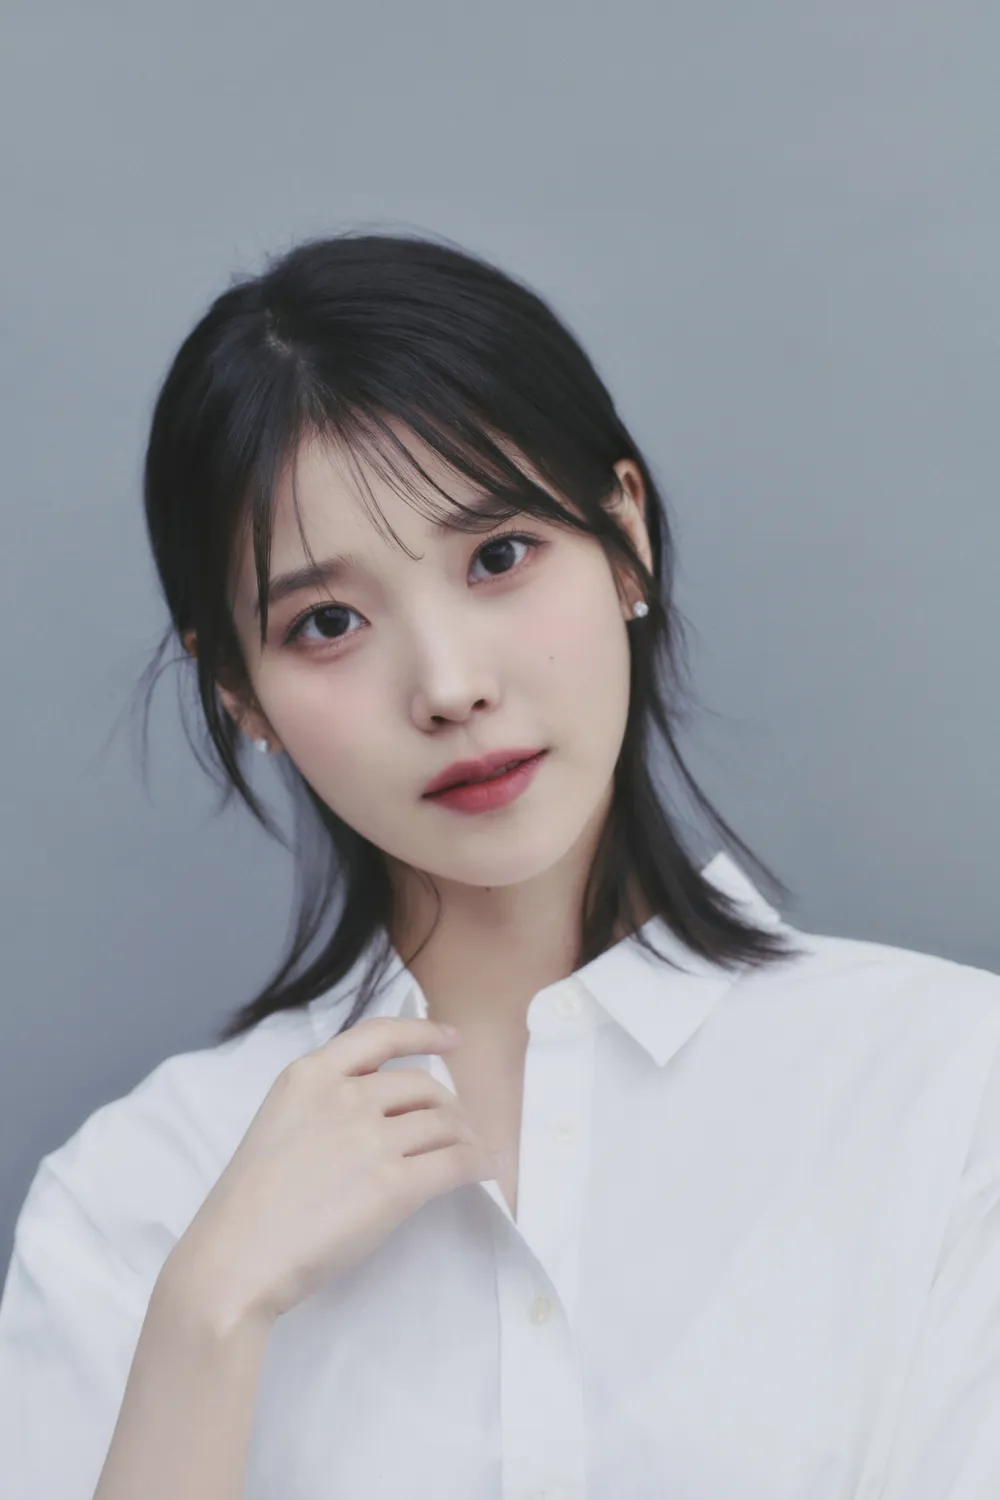

In [16]:
# Upload source image
from google.colab import files
from IPython.display import Image

%cd /content/MobileFaceSwap/asset
uploaded = files.upload()

source_image_path: str = next(iter(uploaded))

from IPython.display import Image
Image(source_image_path)

In [17]:
ls

source.png  target.mp4


## 🚀 이미지 딥페이크 실행

> 업로드 된 이미지를 대상으로 fake 이미지를 생성합니다.
>
> 결과파일은 `MobileFaceSwap/results` 하위에 저장됩니다.

In [18]:
%cd /content/MobileFaceSwap
!python video_test.py --target_video_path asset/$target_video_path --source_img_path asset/$source_image_path --output_path results --use_gpu True


# %cd /content/MobileFaceSwap/results
# from IPython.display import Image
# Image(target_image_path)

/content/MobileFaceSwap
W0604 15:54:13.036820  5770 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.8
W0604 15:54:13.041312  5770 gpu_resources.cc:164] device: 0, cuDNN Version: 9.2.
input mean and std: 127.5 127.5
find model: ./checkpoints/landmarks/glintr100.onnx recognition
find model: ./checkpoints/landmarks/scrfd_10g_bnkps.onnx detection
set det-size: (640, 640)
100% 28/28 [00:11<00:00,  2.48it/s]
